In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv('amz.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,15.5775,15.6490,15.5005,15.5175,15.5175,40960000
1,2015-01-02,15.6290,15.7375,15.3480,15.4260,15.4260,55664000
2,2015-01-05,15.3505,15.4190,15.0425,15.1095,15.1095,55484000
3,2015-01-06,15.1120,15.1500,14.6190,14.7645,14.7645,70380000
4,2015-01-07,14.8750,15.0640,14.7665,14.9210,14.9210,52806000


In [36]:
tk = df['Date'][::80]

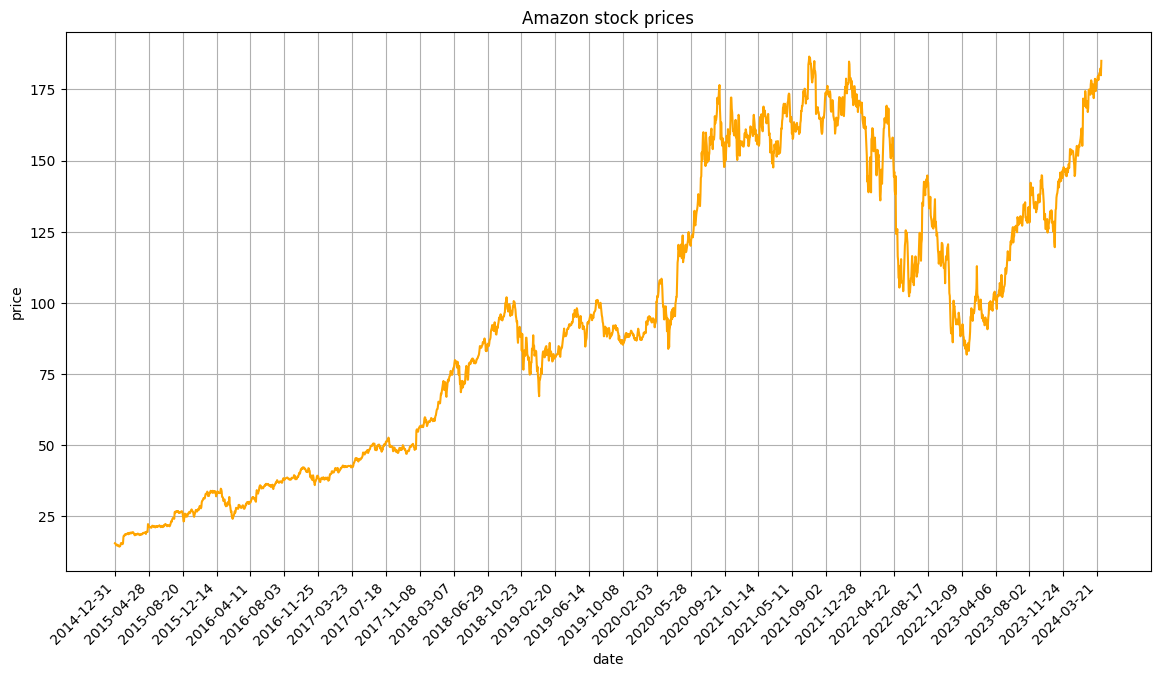

In [38]:
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(df['Date'], df['Close'], color='orange')
ax.set_xlabel('date')
ax.set_ylabel('price')
ax.set_title('Amazon stock prices')

plt.xticks(tk, rotation=45, ha='right')
plt.grid()

plt.show()